# Supervised Learning - Regression


### Implement the Linear Regression algorithm from scratch in Python using Numpy and Pandas and Matplotlib for visualization. The algorithm must be implemented as a function with arguments, x_train (the features) and y_train (the output).  Usage of any library that has an implementation is forbidden. The code must be uploaded to the portal and GitHub and be in Python Notebook format (.ipynb file). The GitHub link is to be attached. The repository has to be open. Evaluation will be done on the code formatting, the final accuracy results, and small explanations of any data preprocessing done (data preprocessing and visualization has bonus points). The explanations must also be included in the same python notebook which can be done using markdown cells. The Python version to be used must be above 3.5.

In [16]:
import numpy as np
import scipy.stats as s
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly as py
sns.set_style('darkgrid')
from tqdm.notebook import tqdm_notebook
from ipywidgets import FloatProgress
from tqdm.notebook import tqdm

#importing various modules


In [17]:
raw_data = pd.read_csv("C:\\Users\\91923\\Downloads\\Medical Price\\Medical Price Dataset.csv")

# importing dataset

In [18]:
raw_data['sex'].replace(to_replace=['male','female'],value=[-1,1],inplace=True)
raw_data['smoker'].replace(to_replace=['yes','no'],value=[-1,1],inplace=True)
raw_data['region'].replace(to_replace=np.unique(raw_data.region),value=[0,1,2,3],inplace=True)

# Changing categorical variables


In [19]:
def train_test_split(df, split_ratio = 0.8,seed = 42):
  
    
    trainX = df.sample(frac=split_ratio,random_state = seed)
    testX = df.drop(trainX.index)
    trainX = trainX.reset_index(drop=True)
    testX = testX.reset_index(drop=True)
    trainY = trainX.charges.values
    trainY = trainY.reshape(trainY.shape[0],1)
    testY = testX.charges.values
    testY = testY.reshape(testY.shape[0],1)
    trainX.drop("charges",axis=1,inplace=True)
    trainX.drop('children',axis=1,inplace=True)
    trainX.drop('sex',axis=1,inplace=True)
    trainX.drop('region',axis=1,inplace=True) 
    testX.drop('children',axis=1,inplace=True)
    testX.drop('sex',axis=1,inplace=True)
    testX.drop('region',axis=1,inplace=True)
    testX.drop("charges",axis=1,inplace=True)
    return trainX,trainY,testX,testY

trainX,trainY,testX,testY = train_test_split(raw_data)

#training split test data


In [20]:
def data_preparation(train,test):
   
    train = np.array(train)
    test = np.array(test)
    trainX = np.array(list(map(lambda x: np.append([1],x) , train)))
    testX = np.array(list(map(lambda x: np.append([1],x) , test)))
    return trainX,testX
trainX,testX = data_preparation(trainX,testX)

# this function will help us load the data

In [21]:
def mse(train,theta_final,train_labels):
   
    m = train.shape[0]
    Y_hat = np.matmul(train,theta_final)
    return (1/(2*m)) * np.sum(np.square(Y_hat - train_labels))

def delta(train,train_labels,p):
  
    m = train.shape[0]
    y_hat = np.dot(train, p)
    a = np.dot(train.T,(y_hat - train_labels))
    return  (2/m)*a

    

In [22]:
theta_initial = np.zeros((trainX.shape[1],1))
theta_final =  np.zeros((trainX.shape[1],1))
m = trainX.shape[0]
iterations = []
residual_points = [0]
lr = 10 ** (-1)


In [27]:
i = 0
for p in tqdm_notebook(range(140478)):
    theta_final = theta_initial - (lr) * delta(trainX,trainY,theta_initial) * (1/ m)
    E = int(mse(trainX,theta_final,trainY))
    residual_points.append(E)
    if residual_points[i] == residual_points[i-1] :
        break

    iterations.append(i)
    theta_initial = theta_final
    i +=1

  0%|          | 0/140478 [00:00<?, ?it/s]

In [24]:
def R2_Statistics(theta_final):
    sst = np.sum((testY-testY.mean())**2)
    ssr = np.sum((np.matmul(testX,theta_final)-testY)**2)
    r2 = 1-(ssr/sst)
    return(r2)

R2_Statistics(theta_final)

0.7487021044819074

<AxesSubplot:>

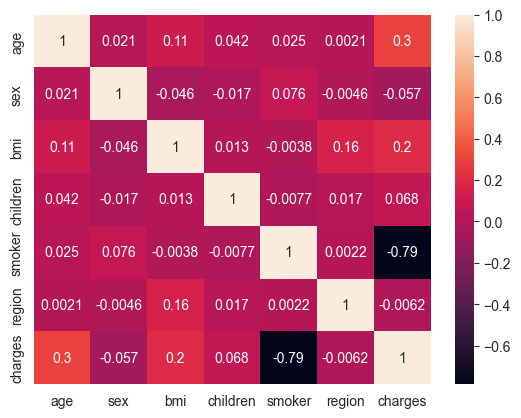

In [25]:
corr = raw_data.corr()
sns.heatmap(corr,annot=True)

C:\Users\91923\AppData\Local\Temp\ipykernel_8832\1298256755.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_data[(raw_data.region == raw_data.region.unique()[i])]["charges"],ax=axes[i])
C:\Users\91923\AppData\Local\Temp\ipykernel_8832\1298256755.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns

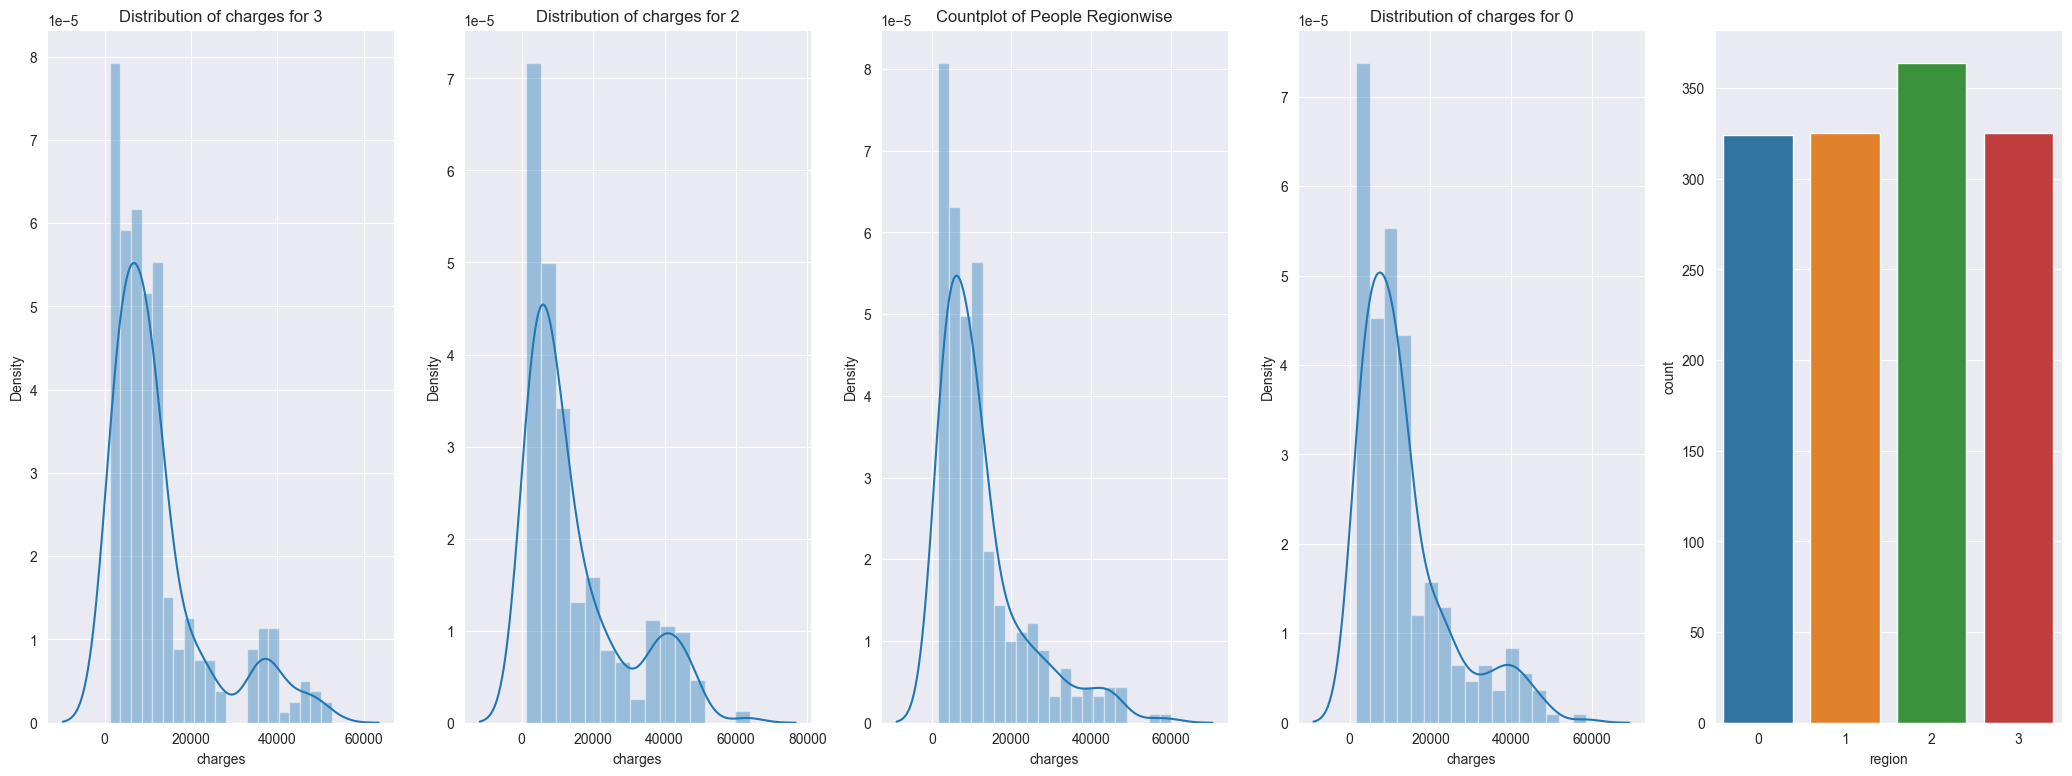

In [26]:
fig,axes = plt.subplots(1,5,figsize=(26,9))
for i in range(0,4):
    sns.distplot(raw_data[(raw_data.region == raw_data.region.unique()[i])]["charges"],ax=axes[i])
    axes[i].set_title(f'Distribution of charges for {raw_data.region.unique()[i]}')

sns.countplot(x="region",data=raw_data,ax=axes[4])
axes[2].set_title("Countplot of People Regionwise")

fig.show()